In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[ 87  96  75 ...  44  41  37]
 [ 79 112 101 ...  47  43  41]
 [ 26  86 124 ...  46  44  41]
 ...
 [ 48  40  39 ...  38  37  34]
 [ 38  39  39 ...  38  37  35]
 [ 37  37  37 ...  36  35  33]]


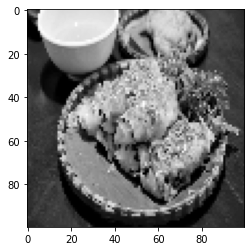

In [ ]:
datadir = "/content/drive/MyDrive/AI test/Food"
categories=['banhcuon','banhmi','bunbo','bundaumamtom','comga','comtam','goicuon','hutieu','myxao','phalau']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 10/10 [00:02<00:00,  4.36it/s]

100


In [ ]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (100, 100, 100, 1)
y (100,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/AI test/Food/save/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/AI test/Food/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in = open("/content/drive/MyDrive/AI test/Food/save/X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/AI test/Food/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (100, 100, 100, 1)
y (100,)


In [ ]:
y= to_categorical(y,11)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/30
2/2 [==============================] - 13s 805ms/step - loss: 5.9410 - accuracy: 0.1111 - val_loss: 14.0336 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 47ms/step - loss: 6.5239 - accuracy: 0.0889 - val_loss: 3.3708 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 47ms/step - loss: 2.3458 - accuracy: 0.1111 - val_loss: 3.3699 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 47ms/step - loss: 2.2473 - accuracy: 0.1889 - val_loss: 4.0889 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 0s 44ms/step - loss: 2.2155 - accuracy: 0.1222 - val_loss: 4.6404 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 0s 45ms/step - loss: 2.1522 - accuracy: 0.1222 - val_loss: 5.1491 - val_accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 0s 46ms/step - loss: 2.0936 - accuracy: 0.2889 - val_loss: 5.9769 - val_accuracy: 0.0000e

In [ ]:
model.save('Food.h5')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation banhcuon


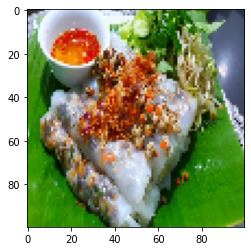

In [ ]:
labels = {0: 'banhcuon',
          1: 'banhmi',
          2: 'bunbo',
          3: 'bundaumamtom',
          4: 'comga',
          5: 'comtam',
          6: 'goicuon',
          7: 'hutieu',
          8: 'myxao',
          9: 'phalau',          
          }
model = load_model('Food.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Food/banhcuon/banhcuon (2).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation goicuon


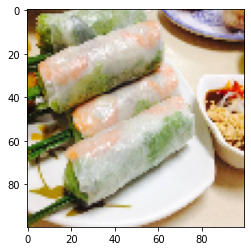

In [ ]:
model = load_model('Food.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Food/goicuon/goicuon (3).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation bundaumamtom


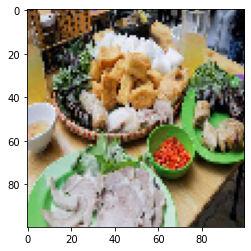

In [ ]:
model = load_model('Food.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Food/bundaumamtom/bundaumamtom (3).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation comga


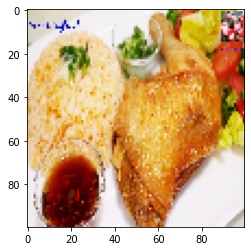

In [ ]:
model = load_model('Food.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Food/comga/comga (4).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation comtam


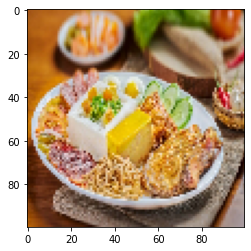

In [ ]:
model = load_model('Food.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Food/comtam/comtam (3).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation hutieu


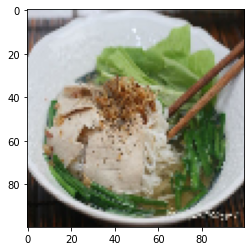

In [ ]:
model = load_model('Food.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Food/hutieu/hutieu (3).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
expectation myxao


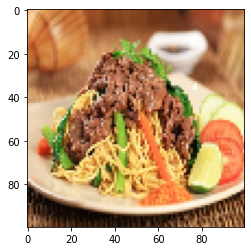

In [ ]:
model = load_model('Food.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Food/myxao/myxao (1).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 